In [22]:
import numpy as np

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [24]:
input_file = "output_20200219_2125PM.csv"
df = pd.read_csv(input_file, header = 0)

In [25]:
df['FLOW'] = df['SRCNODE']+'-'+df['DESTNODE']
df['FM']=df['FAILURE']+df['MISSING']

In [26]:
original_headers = list(df.columns.values)
original_headers

['FILENAME',
 'PATH',
 'SRCNODE',
 'DESTNODE',
 'TIME_START',
 'TIME_END',
 'FILESIZE',
 'THROUGHPUT',
 'RETRIES',
 'FAILURE',
 'MISSING',
 'SRC_R',
 'DEST_S',
 'LABEL',
 'RUN',
 'FLOW',
 'FM']

In [27]:
df.shape

(8006592, 17)

In [28]:
X, y = df.loc[:, df.columns != 'LABEL'], df.values[:, -4]

In [ ]:
# summarize the class distribution
target = df.values[:,-4]
counter = Counter(target)

In [51]:
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))
    df_c=df[(df['LABEL']==k)]
    fm=df_c['FM'].value_counts()
    s=sum(fm)
    for l,n in fm.items():
        print((l,n,n/s))

Class=0, Count=1411344, Percentage=17.627%
(0, 1411344, 1.0)
Class=CacheUC, Count=132, Percentage=0.002%
(0, 121, 0.9166666666666666)
(1, 11, 0.08333333333333333)
Class=CacheFNAL, Count=132, Percentage=0.002%
(0, 121, 0.9166666666666666)
(1, 11, 0.08333333333333333)
Class=CacheCal, Count=132, Percentage=0.002%
(0, 121, 0.9166666666666666)
(1, 11, 0.08333333333333333)
Class=OriginFNAL, Count=132, Percentage=0.002%
(0, 121, 0.9166666666666666)
(1, 11, 0.08333333333333333)
Class=CacheNY, Count=132, Percentage=0.002%
(0, 121, 0.9166666666666666)
(1, 11, 0.08333333333333333)
Class=CacheUNL, Count=132, Percentage=0.002%
(0, 121, 0.9166666666666666)
(1, 11, 0.08333333333333333)
Class=OriginUC, Count=132, Percentage=0.002%
(0, 121, 0.9166666666666666)
(1, 11, 0.08333333333333333)
Class=CacheSDSC, Count=132, Percentage=0.002%
(0, 121, 0.9166666666666666)
(1, 11, 0.08333333333333333)
Class=OriginNCSA, Count=132, Percentage=0.002%
(0, 121, 0.9166666666666666)
(1, 11, 0.08333333333333333)
Class=Or

In [30]:
df['FAILURE'].value_counts(),df['MISSING'].value_counts(),df['FM'].value_counts()

(0    7984200
 1      22392
 Name: FAILURE, dtype: int64, 0    7996475
 1      10117
 Name: MISSING, dtype: int64, 0    7974083
 1      32509
 Name: FM, dtype: int64)

In [37]:
df_c=df[(df['LABEL']==None)]
display(df_c)

,FILENAME,PATH,SRCNODE,DESTNODE,TIME_START,TIME_END,FILESIZE,THROUGHPUT,RETRIES,FAILURE,MISSING,SRC_R,DEST_S,LABEL,RUN,FLOW,FM


In [32]:
df.describe()

,FILESIZE,RETRIES,FAILURE,MISSING,FM
count,8.006592e+06,8.006592e+06,8.006592e+06,8.006592e+06,8.006592e+06
mean,8.783711e+05,1.470039e-04,2.796696e-03,1.263584e-03,4.060279e-03
std,6.188627e+06,1.212362e-02,5.280979e-02,3.552446e-02,6.359083e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.260000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.441000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.210000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,8.247744e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


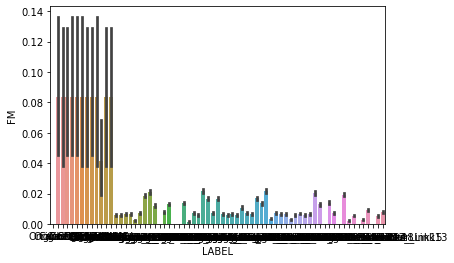

In [64]:
sns.barplot(x="LABEL", y="FM", data=df);

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt

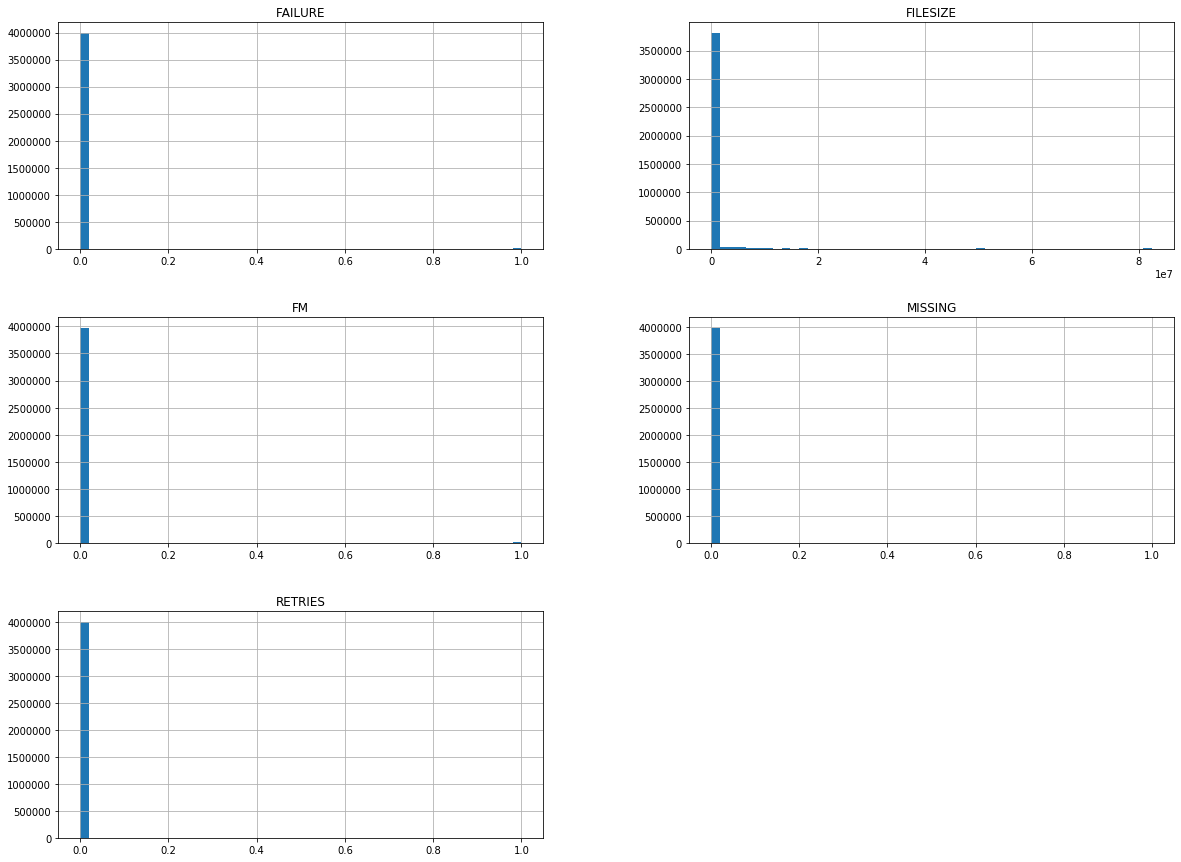

In [68]:
df.hist(bins=50,figsize=(20,15))
plt.show()

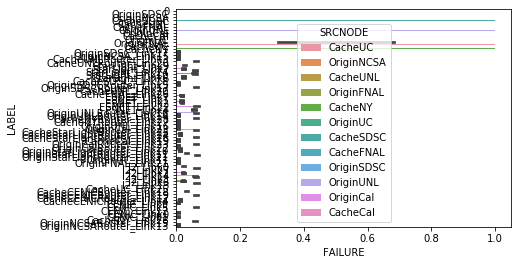

In [69]:
sns.barplot(y="LABEL", x="FAILURE", hue="SRCNODE", data=df);

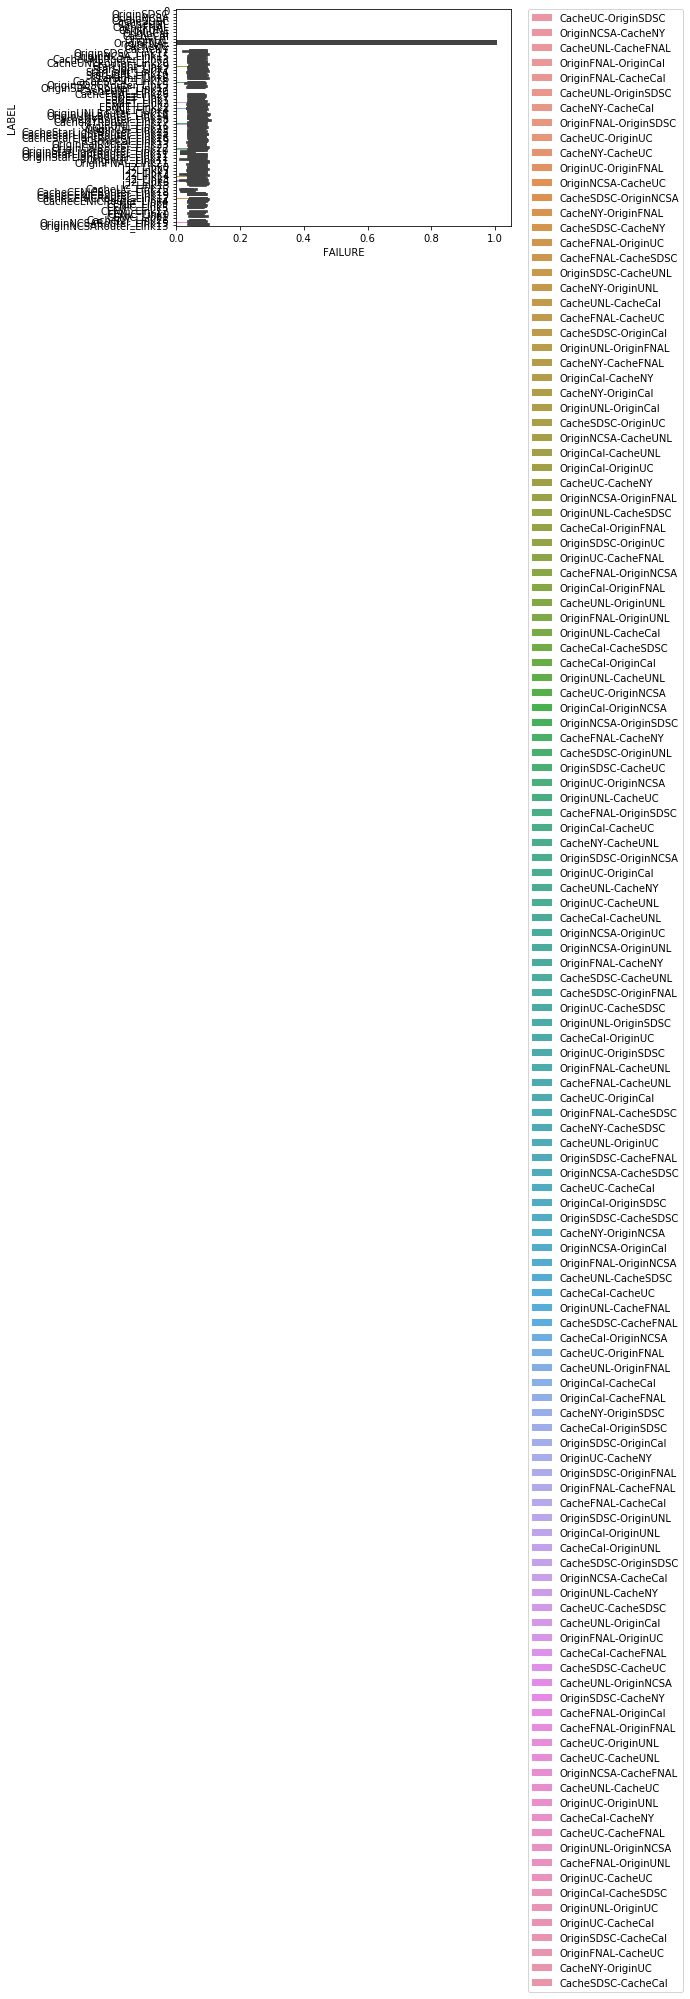

In [19]:
sns.barplot(y="LABEL", x="FAILURE", hue="FLOW", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [11]:
label_f = df['LABEL'].value_counts().index.values
label_f.size

69

In [71]:
df.groupby(['FLOW']).mean()

,FILESIZE,RETRIES,FAILURE,MISSING,FM
FLOW,,,,,
CacheCal-CacheFNAL,878758.266091,0.000264,0.003693,0.000297,0.003990
CacheCal-CacheNY,879332.409918,0.000198,0.003792,0.007155,0.010947
CacheCal-CacheSDSC,866522.610657,0.000033,0.000956,0.014343,0.015299
CacheCal-CacheUC,879342.855315,0.000231,0.003825,0.002539,0.006364
CacheCal-CacheUNL,879350.238295,0.000198,0.003693,0.003660,0.007353
...,...,...,...,...,...
OriginUNL-OriginCal,879339.690715,0.000462,0.004715,0.000297,0.005012
OriginUNL-OriginFNAL,879279.675811,0.000363,0.004715,0.000363,0.005078
OriginUNL-OriginNCSA,879108.955058,0.000165,0.004023,0.000264,0.004286


In [72]:
print(df.groupby(['FLOW', 'LABEL']).mean()['FM'])
print(df.groupby(['FLOW', 'LABEL']).std()['FM'])

FLOW                LABEL           
CacheCal-CacheFNAL  0                   0.000000
                    CENIC_Link0         0.000000
                    CENIC_Link1         0.000000
                    CENIC_Link12        0.000000
                    CENIC_Link5         0.000000
                                          ...   
OriginUNL-OriginUC  StarLight_Link10    0.006726
                    StarLight_Link24    0.000000
                    StarLight_Link6     0.073991
                    StarLight_Link7     0.000000
                    StarLight_Link9     0.000000
Name: FM, Length: 9108, dtype: float64
FLOW                LABEL           
CacheCal-CacheFNAL  0                   0.00000
                    CENIC_Link0         0.00000
                    CENIC_Link1         0.00000
                    CENIC_Link12        0.00000
                    CENIC_Link5         0.00000
                                         ...   
OriginUNL-OriginUC  StarLight_Link10    0.08183
            

In [21]:
df_43=df[(df['DESTNODE']=='CacheFNAL') & (df['RETRIES']==1) & (df['FAILURE']==1)]
display(df_43)

,FILENAME,PATH,SRCNODE,DESTNODE,TIME_START,TIME_END,FILESIZE,THROUGHPUT,RETRIES,FAILURE,MISSING,SRC_R,DEST_S,LABEL,RUN,FLOW
1200285,lys.Jun9.bbdep.regular.lib,20190425T121649-0700/00/00/minirosetta_databas...,CacheNY,CacheFNAL,2019-10-08 14:30:02,2019-10-08 14:30:03,11501480,104 MB/s,1,1,0,CacheNYRouter,CacheStarLightRouter,StarLight_Link6,run21,CacheNY-CacheFNAL
1777425,tyr.Jun9.bbdep.regular.lib,20190425T121649-0700/00/00/minirosetta_databas...,CacheCal,CacheFNAL,2019-10-08 19:46:39,2019-10-08 19:46:40,2762215,88.3 MB/s,1,1,0,CacheCENICRouter,CacheStarLightRouter,ESNET_Link4,run31,CacheCal-CacheFNAL
3644735,Rama_smooth_dyn.dat_ss_6.4,20190425T121649-0700/00/00/minirosetta_database,OriginSDSC,CacheFNAL,2019-10-09 12:15:32,2019-10-09 12:15:34,4354560,101 MB/s,1,1,0,OriginSDSCRouter,CacheStarLightRouter,CENIC_Link5,run62,OriginSDSC-CacheFNAL


In [77]:
df_node_group = df.groupby(['FLOW','LABEL']).mean()['FM']
print(df_node_group.to_string())

FLOW                   LABEL                       
CacheCal-CacheFNAL     0                               0.000000
                       CENIC_Link0                     0.000000
                       CENIC_Link1                     0.000000
                       CENIC_Link12                    0.000000
                       CENIC_Link5                     0.000000
                       CENIC_Link9                     0.000000
                       CacheCENICRouter_Link12         0.000000
                       CacheCENICRouter_Link18         0.000000
                       CacheCENICRouter_Link19         0.060538
                       CacheCENICRouter_Link4          0.006726
                       CacheCal                        1.000000
                       CacheCal_Link19                 0.006726
                       CacheFNAL                       0.000000
                       CacheFNAL_Link26                0.000000
                       CacheNY                      

In [25]:
label_tb=df.groupby(['LABEL','FLOW']).mean()['FAILURE']

In [26]:
label_tb.head()

LABEL  FLOW              
0      CacheCal-CacheFNAL    0.0
       CacheCal-CacheNY      0.0
       CacheCal-CacheSDSC    0.0
       CacheCal-CacheUC      0.0
       CacheCal-CacheUNL     0.0
Name: FAILURE, dtype: float64

In [27]:
label_tb.describe()

count    9108.000000
mean        0.017736
std         0.116266
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: FAILURE, dtype: float64

In [28]:
t1=df.groupby(['LABEL']).mean()['FAILURE']

In [29]:
t1.values

array([0.        , 0.0019364 , 0.00149477, 0.        , 0.00512977,
       0.00186846, 0.        , 0.00271776, 0.00523169, 0.01000476,
       0.08333333, 0.00555442, 0.08333333, 0.        , 0.08333333,
       0.0057073 , 0.00524868, 0.        , 0.08333333, 0.        ,
       0.0098349 , 0.00519772, 0.00514676, 0.08333333, 0.        ,
       0.08333333, 0.00518073, 0.00518073, 0.        , 0.00139285,
       0.00572428, 0.00533361, 0.00932532, 0.00565634, 0.00190243,
       0.00536758, 0.004858  , 0.00553744, 0.00531662, 0.00518073,
       0.007287  , 0.08333333, 0.00543552, 0.0052147 , 0.00545251,
       0.04166667, 0.00586017, 0.08333333, 0.00553744, 0.004858  ,
       0.00550347, 0.08333333, 0.00514676, 0.00507882, 0.00536758,
       0.00974997, 0.00270077, 0.00538456, 0.08333333, 0.0049769 ,
       0.08333333, 0.00569031, 0.00514676, 0.00528265, 0.00939326,
       0.00991983, 0.00769466, 0.00563935, 0.00208928])

In [30]:
lf=label_tb.to_frame()

In [31]:
lf.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9108 entries, (0, CacheCal-CacheFNAL) to (StarLight_Link9, OriginUNL-OriginUC)
Data columns (total 1 columns):
FAILURE    9108 non-null float64
dtypes: float64(1)
memory usage: 99.5+ KB


In [32]:
lf.head()

FAILURE
LABEL FLOW                       
0     CacheCal-CacheFNAL      0.0
      CacheCal-CacheNY        0.0
      CacheCal-CacheSDSC      0.0
      CacheCal-CacheUC        0.0
      CacheCal-CacheUNL       0.0

In [33]:
lf.columns.values

array(['FAILURE'], dtype=object)

In [34]:
label_tb.keys()[0]

('0', 'CacheCal-CacheFNAL')

In [35]:
label_tb

LABEL            FLOW                
0                CacheCal-CacheFNAL      0.0
                 CacheCal-CacheNY        0.0
                 CacheCal-CacheSDSC      0.0
                 CacheCal-CacheUC        0.0
                 CacheCal-CacheUNL       0.0
                                        ... 
StarLight_Link9  OriginUNL-OriginCal     0.0
                 OriginUNL-OriginFNAL    0.0
                 OriginUNL-OriginNCSA    0.0
                 OriginUNL-OriginSDSC    0.0
                 OriginUNL-OriginUC      0.0
Name: FAILURE, Length: 9108, dtype: float64

In [36]:
df.iloc[20000]

FILENAME                                             ARG.params
PATH          20190425T121649-0700/00/00/minirosetta_databas...
SRCNODE                                               OriginUNL
DESTNODE                                               CacheUNL
TIME_START                                  2019-10-08 03:46:25
TIME_END                                    2019-10-08 03:46:25
FILESIZE                                                   3356
THROUGHPUT                                             522 MB/s
RETRIES                                                       0
FAILURE                                                       0
MISSING                                                       0
SRC_R                                           OriginUNLRouter
DEST_S                                           CacheUNLRouter
LABEL                                                         0
RUN                                                        run1
FLOW                                    

In [17]:
# baseline model and test harness for the glass identification dataset
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
 
# load the dataset
def load_dataset(data):
	# split into input and output elements
	X, y = data.loc[:, data.columns != 'LABEL'], data.values[:, -4]
	# label encode the target variable to have the classes 0 and 1
	y = LabelEncoder().fit_transform(y)
	return X, y
 
# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# load the dataset
X, y = load_dataset(df)
# summarize the loaded dataset
print(X.shape, y.shape, Counter(y))
# define the reference model
model = DummyClassifier(strategy='most_frequent')
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

(8006592, 16) (8006592,) Counter({0: 1411344, 24: 117744, 13: 117744, 3: 117744, 2: 117744, 1: 117744, 4: 117744, 5: 117744, 11: 117744, 46: 117744, 9: 117744, 8: 117744, 6: 117744, 7: 117744, 40: 117744, 35: 117744, 37: 117744, 39: 117744, 36: 117744, 38: 117744, 34: 117744, 17: 117744, 28: 117744, 59: 117744, 52: 117744, 53: 117744, 19: 117744, 56: 117744, 57: 117744, 55: 117744, 50: 117744, 62: 117744, 61: 117744, 32: 117744, 30: 117744, 31: 117744, 33: 117744, 29: 117744, 63: 117744, 54: 117744, 42: 117744, 43: 117744, 48: 117744, 49: 117744, 16: 117744, 15: 117744, 26: 117744, 27: 117744, 66: 117744, 67: 117744, 65: 117744, 68: 117744, 64: 117744, 21: 117744, 22: 117744, 20: 117744, 44: 117744, 23: 132, 12: 132, 10: 132, 45: 132, 14: 132, 25: 132, 58: 132, 18: 132, 47: 132, 60: 132, 51: 132, 41: 132})
Mean Accuracy: 0.176 (0.000)


In [20]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
# define models to test
def get_models():
	models, names = list(), list()
	# SVM
	models.append(SVC(gamma='auto'))
	names.append('SVM')
	# KNN
	models.append(KNeighborsClassifier())
	names.append('KNN')
	# Bagging
	models.append(BaggingClassifier(n_estimators=1000))
	names.append('BAG')
	# RF
	models.append(RandomForestClassifier(n_estimators=1000))
	names.append('RF')
	# ET
	models.append(ExtraTreesClassifier(n_estimators=1000))
	names.append('ET')
	return models, names

In [21]:
# define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
	# evaluate the model and store results
	scores = evaluate_model(X, y, models[i])
	results.append(scores)
	# summarize performance
	print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

ValueError: could not convert string to float: 'CacheUNL-CacheNY'

In [ ]:
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# define the model
weights = {0:1.0, 1:1.0, 2:2.0, 3:2.0, 4:2.0, 5:2.0}
model = RandomForestClassifier(n_estimators=1000, class_weight=weights)
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
import sklearn

In [40]:
df_failure = df[df['FAILURE']==1]

In [41]:
df_dummy = pd.get_dummies(df[['SRCNODE', 'DESTNODE','RETRIES','FAILURE','LABEL']], prefix=['SRC', 'DEST'], columns=['SRCNODE', 'DESTNODE'])

In [42]:
df_dummy.head()

,RETRIES,FAILURE,LABEL,SRC_CacheCal,SRC_CacheFNAL,SRC_CacheNY,SRC_CacheSDSC,SRC_CacheUC,SRC_CacheUNL,SRC_OriginCal,...,DEST_CacheNY,DEST_CacheSDSC,DEST_CacheUC,DEST_CacheUNL,DEST_OriginCal,DEST_OriginFNAL,DEST_OriginNCSA,DEST_OriginSDSC,DEST_OriginUC,DEST_OriginUNL
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,OriginSDSC,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
y=df['LABEL']

In [44]:
x=df_dummy.drop(['LABEL'],axis=1)
x.head()

,RETRIES,FAILURE,SRC_CacheCal,SRC_CacheFNAL,SRC_CacheNY,SRC_CacheSDSC,SRC_CacheUC,SRC_CacheUNL,SRC_OriginCal,SRC_OriginFNAL,...,DEST_CacheNY,DEST_CacheSDSC,DEST_CacheUC,DEST_CacheUNL,DEST_OriginCal,DEST_OriginFNAL,DEST_OriginNCSA,DEST_OriginSDSC,DEST_OriginUC,DEST_OriginUNL
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
clf = DecisionTreeClassifier(max_depth = 20)

In [ ]:
clf_model=clf.fit(x,y)

In [ ]:
import graphviz 

In [ ]:
dot_data = tree.export_graphviz(clf_model, out_file=None,
                         feature_names=x.columns, 
                         class_names=clf.classes_,
                         filled=True, rounded=True,
                         special_characters=True)

In [ ]:
graph = graphviz.Source(dot_data) 

In [ ]:
graph.render("simple")

In [ ]:
clf_model.predict(x[1200285:1200286])

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(clf, x, y, scoring='accuracy',cv=5)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [ ]:
y_pred = clf.fit(x_train, y_train).predict(x_test)

In [ ]:
print(y_train.size,y_test.size)

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
multilabel_confusion_matrix(y_test, y_pred)

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
np.set_printoptions(precision=2)

class_names = label_f

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
def count(y, label):
    count=0
    for yy in y:
        if yy==label:
            count=count+1
    print(label,count)
    return count
        

In [ ]:
count(y_test,'CacheUNLRouter_Link3')

In [9]:
from skmultilearn.dataset import load_dataset

In [10]:
X_train, y_train, feature_names, label_names = load_dataset('emotions', 'train')
X_test, y_test, _, _ = load_dataset('emotions', 'test')

emotions:train - does not exists downloading
Downloaded emotions-train
emotions:test - does not exists downloading
Downloaded emotions-test


In [11]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC

In [12]:
clf = BinaryRelevance(
    classifier=SVC(),
    require_dense=[False, True]
)

In [13]:
clf.fit(X_train, y_train)

/Users/yxin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/yxin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/yxin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/yxin/anaconda3/lib/python3.7/site-packages/sklearn/

BinaryRelevance(classifier=SVC(C=1.0, cache_size=200, class_weight=None,
                               coef0=0.0, decision_function_shape='ovr',
                               degree=3, gamma='auto_deprecated', kernel='rbf',
                               max_iter=-1, probability=False,
                               random_state=None, shrinking=True, tol=0.001,
                               verbose=False),
                require_dense=[False, True])

In [14]:
X_train

<391x72 sparse matrix of type '<class 'numpy.float64'>'
	with 28059 stored elements in LInked List format>

In [16]:
y_train

<391x6 sparse matrix of type '<class 'numpy.int64'>'
	with 709 stored elements in LInked List format>